In [196]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [317]:
df = pd.read_csv(r'C:\Users\archi\OneDrive\Desktop\Python Projects\Albone Dataset\train.csv')

In [198]:
import warnings

# Ignore the specific FutureWarning
warnings.filterwarnings("ignore", message="numpy.*")

In [199]:
df.dtypes

id                  int64
Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Whole weight.1    float64
Whole weight.2    float64
Shell weight      float64
Rings               int64
dtype: object

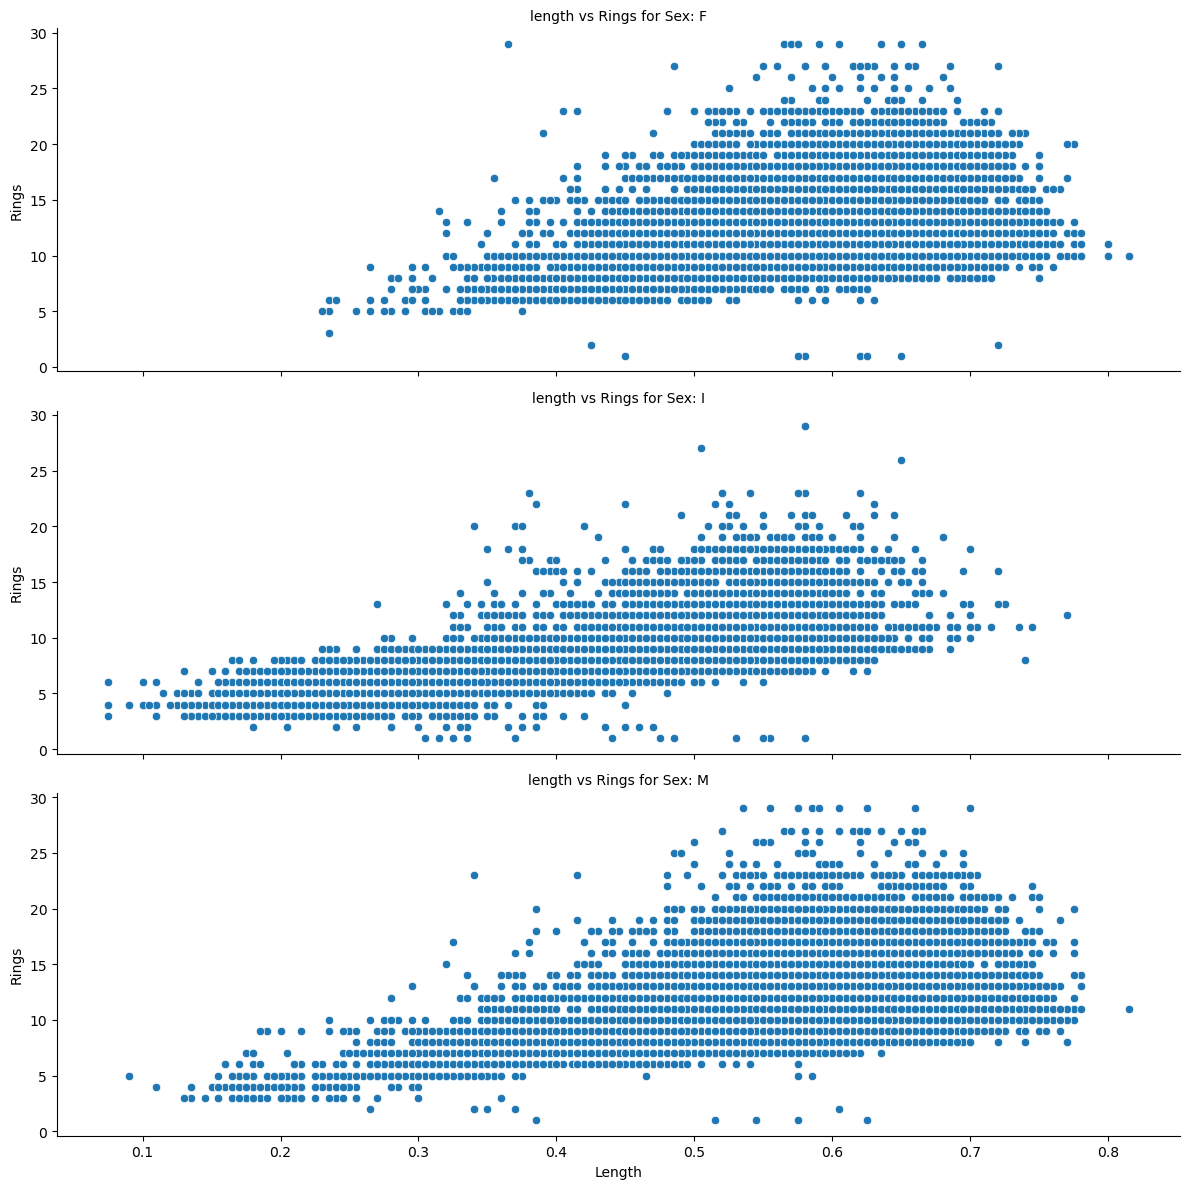

In [200]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.FacetGrid(df, row='Sex', height=4, aspect=3)
g.map(sns.scatterplot, 'Length', 'Rings')

# Set titles
g.set_titles("length vs Rings for Sex: {row_name}")
g.set_axis_labels('Length', 'Rings')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

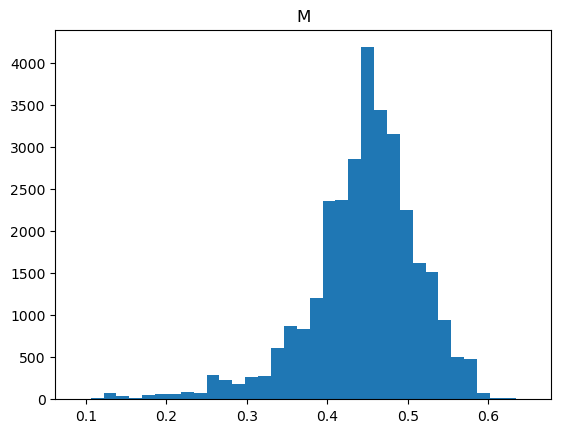

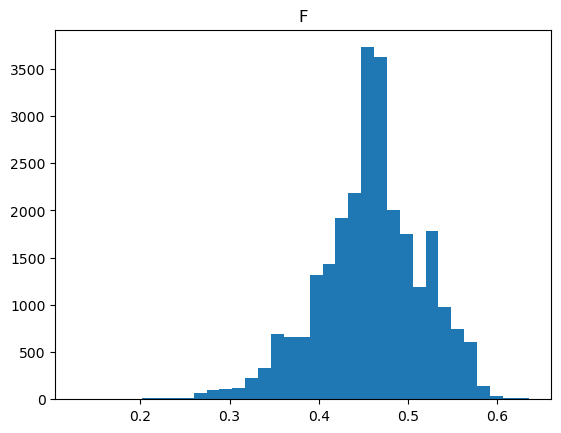

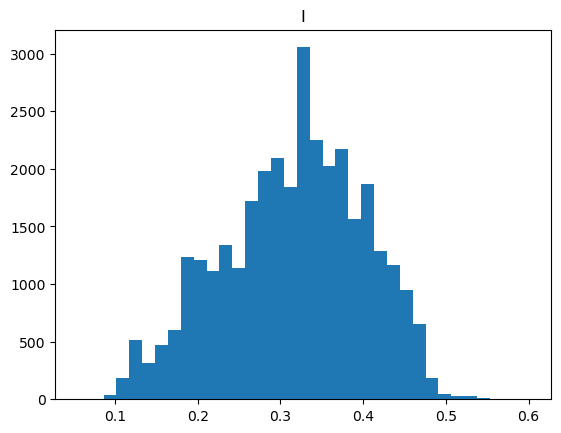

In [5]:
for i in ['M', 'F', 'I']:
    ax = plt.subplots()
    dff = df[df['Sex'] == i]
    plt.hist(dff['Diameter'], bins = 35)
    plt.title(i)
    plt.show()
    

In [6]:
from statsmodels.formula.api import ols

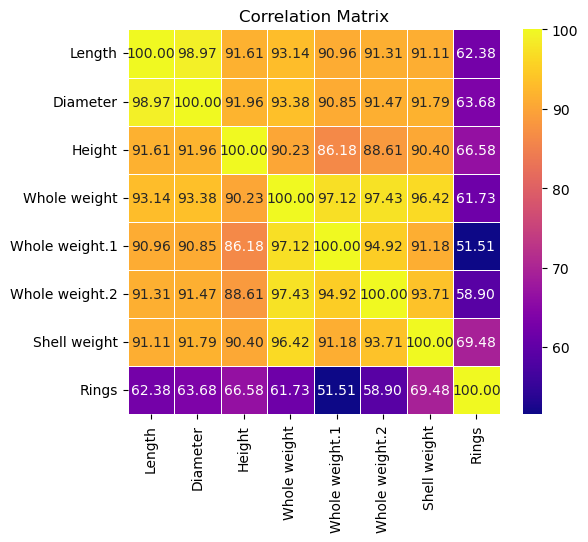

In [8]:
df_corr = df.drop(['id', 'Sex'], axis = 1 )

plt.figure(figsize=(6, 5))
sns.heatmap(df_corr.corr()*100, annot=True,cmap = 'plasma', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Add constant to the DataFrame (required for VIF calculation)
df_with_const = add_constant(df_corr)

# Calculate VIF for each variable
vif_data = pd.DataFrame()

vif_data["Variable"] = df_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(df_with_const.values, i) for i in range(df_with_const.shape[1])]

print(vif_data)

         Variable        VIF
0           const  67.258804
1          Length  51.185096
2        Diameter  54.075470
3          Height   7.957007
4    Whole weight  69.986776
5  Whole weight.1  24.059530
6  Whole weight.2  20.069668
7    Shell weight  20.167251
8           Rings   2.495873


In [202]:
df.columns = ['id','Sex','Length','Diameter','Height','ww','ww_1','ww_2','sw','Rings']

In [203]:
df

id Sex  Length  Diameter  Height      ww    ww_1    ww_2      sw  \
0          0   F   0.550     0.430   0.150  0.7715  0.3285  0.1465  0.2400   
1          1   F   0.630     0.490   0.145  1.1300  0.4580  0.2765  0.3200   
2          2   I   0.160     0.110   0.025  0.0210  0.0055  0.0030  0.0050   
3          3   M   0.595     0.475   0.150  0.9145  0.3755  0.2055  0.2500   
4          4   I   0.555     0.425   0.130  0.7820  0.3695  0.1600  0.1975   
...      ...  ..     ...       ...     ...     ...     ...     ...     ...   
90610  90610   M   0.335     0.235   0.075  0.1585  0.0685  0.0370  0.0450   
90611  90611   M   0.555     0.425   0.150  0.8790  0.3865  0.1815  0.2400   
90612  90612   I   0.435     0.330   0.095  0.3215  0.1510  0.0785  0.0815   
90613  90613   I   0.345     0.270   0.075  0.2000  0.0980  0.0490  0.0700   
90614  90614   I   0.425     0.325   0.100  0.3455  0.1525  0.0785  0.1050   

       Rings  
0         11  
1         11  
2          6  
3         10  
4          9  
...      ...  
90610      6  
90611      9  
90612      6  
90613      6  
90614      8  

[90615 rows x 10 columns]

#### Regerssion Model

In [245]:
rings = ols('Rings ~ Sex:ww_2 + 0 ', data = df).fit()
print(rings.summary())
print('')
print('Below are coeffs: ')
print(rings.params)

                                 OLS Regression Results                                
Dep. Variable:                  Rings   R-squared (uncentered):                   0.850
Model:                            OLS   Adj. R-squared (uncentered):              0.850
Method:                 Least Squares   F-statistic:                          1.715e+05
Date:                Sun, 14 Apr 2024   Prob (F-statistic):                        0.00
Time:                        23:18:44   Log-Likelihood:                     -2.5302e+05
No. Observations:               90615   AIC:                                  5.060e+05
Df Residuals:                   90612   BIC:                                  5.061e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [11]:
test_df = pd.read_csv(r'C:\Users\archi\OneDrive\Desktop\Python Projects\Albone Dataset\test.csv')

In [12]:
test_df

id Sex  Length  Diameter  Height  Whole weight  Whole weight.1  \
0       90615   M   0.645     0.475   0.155        1.2380          0.6185   
1       90616   M   0.580     0.460   0.160        0.9830          0.4785   
2       90617   M   0.560     0.420   0.140        0.8395          0.3525   
3       90618   M   0.570     0.490   0.145        0.8740          0.3525   
4       90619   I   0.415     0.325   0.110        0.3580          0.1575   
...       ...  ..     ...       ...     ...           ...             ...   
60406  151021   I   0.345     0.260   0.085        0.1775          0.0735   
60407  151022   F   0.525     0.410   0.145        0.8445          0.3885   
60408  151023   I   0.590     0.440   0.155        1.1220          0.3930   
60409  151024   F   0.660     0.525   0.190        1.4935          0.5885   
60410  151025   F   0.430     0.340   0.120        0.4150          0.1525   

       Whole weight.2  Shell weight  
0              0.3125        0.3005  
1              0.2195        0.2750  
2              0.1845        0.2405  
3              0.1865        0.2350  
4              0.0670        0.1050  
...               ...           ...  
60406          0.0265        0.0500  
60407          0.1670        0.2050  
60408          0.2000        0.2650  
60409          0.3575        0.4350  
60410          0.0910        0.0905  

[60411 rows x 9 columns]

In [207]:
#pred_data = test_df.assign(predicted_Rings = rings.predict(test_df[['Sex','Height', 'sw']]))

In [237]:
pred_data_2 = df.assign(predicted_Rings = rings.predict(df[['Sex','Diameter', 'sw']]))
pred_data_2['predicted_Rings'] = round(pred_data_2['predicted_Rings'],0)
pred_data_2['predicted_Rings'] = pred_data_2['predicted_Rings'].astype('int64')

In [228]:
pred_data_2.dtypes

id                   int64
Sex                 object
Length             float64
Diameter           float64
Height             float64
ww                 float64
ww_1               float64
ww_2               float64
sw                 float64
Rings                int64
predicted_Rings      int64
dtype: object

In [215]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(mean_absolute_percentage_error(pred_data_2['Rings'], pred_data_2['predicted_Rings']))

16.597977130331177


In [417]:
import numpy as np

def RMSLE(y_predicted, y_true):
    """
    Calculate the expression:
    sqrt(mean((log(1 + y_predicted) - log(1 + y_true)) ** 2))
    """
    y_predicted = np.array(y_predicted)
    y_true = np.array(y_true)

    # Calculate the expression
    expression_result = np.sqrt(np.mean((np.log(1 + y_predicted) - np.log(1 + y_true)) ** 2))
    
    return expression_result
print(RMSLE(pred_data_2['Rings'], pred_data_2['predicted_Rings']))

0.2022683141412391


In [238]:
print(RMSLE(pred_data_2['Rings'], pred_data_2['predicted_Rings']))

0.2022683141412144


In [19]:
pred_data = test_df.assign(predicted_Rings = rings.predict(test_df[['Sex','Height']]))

In [20]:
pred_data['predicted_Rings'] = round(pred_data['predicted_Rings'], 0)
pred_data['predicted_Rings'] = pred_data['predicted_Rings'].astype('int32')

In [21]:
pred_data.head()

id Sex  Length  Diameter  Height  Whole weight  Whole weight.1  \
0  90615   M   0.645     0.475   0.155        1.2380          0.6185   
1  90616   M   0.580     0.460   0.160        0.9830          0.4785   
2  90617   M   0.560     0.420   0.140        0.8395          0.3525   
3  90618   M   0.570     0.490   0.145        0.8740          0.3525   
4  90619   I   0.415     0.325   0.110        0.3580          0.1575   

   Whole weight.2  Shell weight  predicted_Rings  
0          0.3125        0.3005               11  
1          0.2195        0.2750               11  
2          0.1845        0.2405               10  
3          0.1865        0.2350               10  
4          0.0670        0.1050                8

In [22]:
res = pred_data[['id', 'predicted_Rings']]

In [23]:
res.columns = ['id', 'Rings']

In [24]:
res.to_csv('res.csv', index = False)

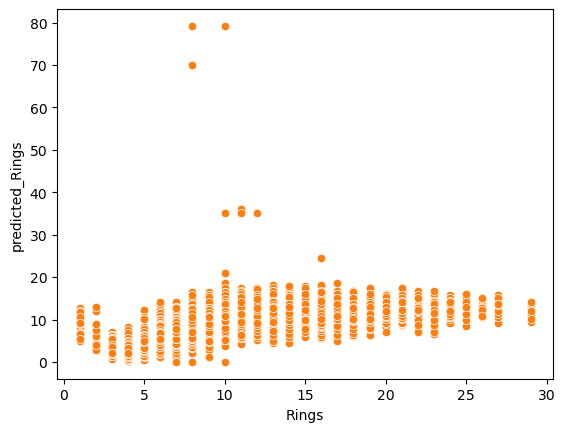

In [28]:
sns.scatterplot(x = 'Rings', y = 'predicted_Rings', data = pred_data_2)
plt.show()

### KNN

In [248]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

In [318]:
df.columns = ['id','Sex','Length','Diameter','Height','ww','ww_1','ww_2','sw','Rings']
dummies = pd.get_dummies(df['Sex'], prefix='Sex')
df = pd.concat([df, dummies], axis = 1)

In [319]:
df.head()

id Sex  Length  Diameter  Height      ww    ww_1    ww_2      sw  Rings  \
0   0   F   0.550     0.430   0.150  0.7715  0.3285  0.1465  0.2400     11   
1   1   F   0.630     0.490   0.145  1.1300  0.4580  0.2765  0.3200     11   
2   2   I   0.160     0.110   0.025  0.0210  0.0055  0.0030  0.0050      6   
3   3   M   0.595     0.475   0.150  0.9145  0.3755  0.2055  0.2500     10   
4   4   I   0.555     0.425   0.130  0.7820  0.3695  0.1600  0.1975      9   

   Sex_F  Sex_I  Sex_M  
0      1      0      0  
1      1      0      0  
2      0      1      0  
3      0      0      1  
4      0      1      0

In [368]:
x = df[['Height','Diameter','Length','sw', 'ww']]
# ,'Sex_F', 'Sex_I', 'Sex_M'
y = df[['Rings']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state = 42)

In [369]:
model = KNeighborsRegressor(60)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(RMSLE(y_test, y_pred))

Rings    0.164663
dtype: float64


In [387]:
df['Total_W'] = df['ww'] * df['ww_1'] * df['ww_2']

In [388]:
df.head()

id Sex  Length  Diameter  Height      ww    ww_1    ww_2      sw  Rings  \
0   0   F   0.550     0.430   0.150  0.7715  0.3285  0.1465  0.2400     11   
1   1   F   0.630     0.490   0.145  1.1300  0.4580  0.2765  0.3200     11   
2   2   I   0.160     0.110   0.025  0.0210  0.0055  0.0030  0.0050      6   
3   3   M   0.595     0.475   0.150  0.9145  0.3755  0.2055  0.2500     10   
4   4   I   0.555     0.425   0.130  0.7820  0.3695  0.1600  0.1975      9   

   Sex_F  Sex_I  Sex_M       Total_W  
0      1      0      0  3.712863e-02  
1      1      0      0  1.430998e-01  
2      0      1      0  3.465000e-07  
3      0      0      1  7.056762e-02  
4      0      1      0  4.623184e-02

In [429]:
x = df[['Height','Diameter','Length']].dropna()
# ,'Sex_F', 'Sex_I', 'Sex_M'
y = df[['Rings']].dropna()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state = 42)

In [423]:
model = KNeighborsRegressor(60)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(RMSLE(y_test, y_pred))

0.15369778307328372


In [424]:
mean_absolute_percentage_error(y_test, y_pred)

12.752217705436273

In [410]:
y_pred

array([[ 9.1       ],
       [ 7.33333333],
       [ 9.5       ],
       ...,
       [ 9.26666667],
       [10.28333333],
       [12.8       ]])

In [425]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [426]:
mean_absolute_percentage_error(y_test, y_pred)

37.80068518179906

In [427]:
RMSLE(y_test, y_pred)

0.40538478316622123

In [432]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(mean_absolute_percentage_error(y_test, y_pred))
print(RMSLE(y_test, y_pred))

35.041979902923636
0.372282970337181


In [ ]:
# ,'sw','ww','ww_1','ww_2','sw','Sex_F', 'Sex_I', 'Sex_M'

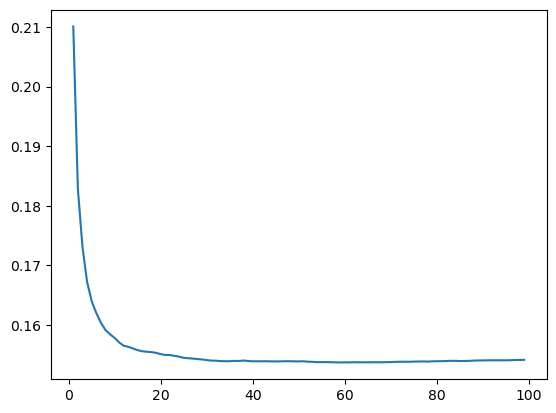

In [325]:
d = {}
for i in range(1,100):
    #print(i)
    model = KNeighborsRegressor(i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    d[i] = RMSLE(y_test, y_pred)
    
g = pd.DataFrame(d)
g = g.transpose()

plt.xticks()
plt.plot(g)
plt.show()



Rings    0.155776
dtype: float64


C:\Users\archi\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


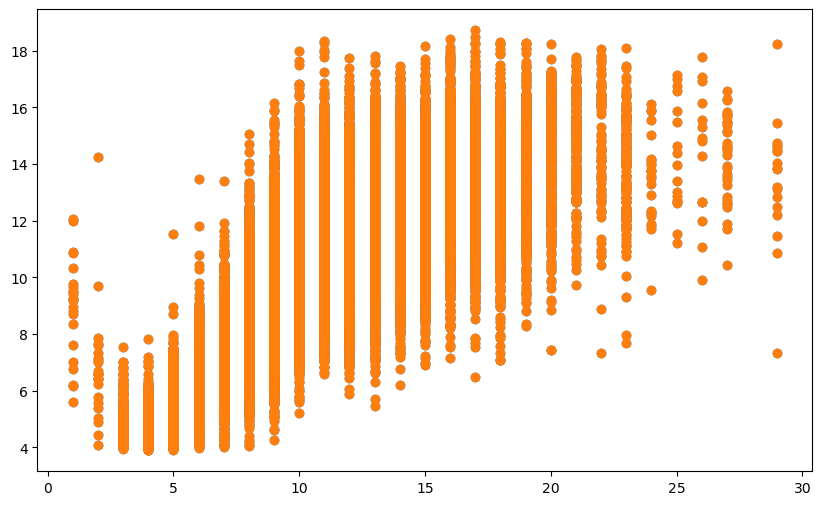

In [105]:
plt.scatter(x = y_test, y = y_pred)
plt.show()

In [264]:
df

id Sex  Length  Diameter  Height      ww    ww_1    ww_2      sw  \
0          0   F   0.550     0.430   0.150  0.7715  0.3285  0.1465  0.2400   
1          1   F   0.630     0.490   0.145  1.1300  0.4580  0.2765  0.3200   
2          2   I   0.160     0.110   0.025  0.0210  0.0055  0.0030  0.0050   
3          3   M   0.595     0.475   0.150  0.9145  0.3755  0.2055  0.2500   
4          4   I   0.555     0.425   0.130  0.7820  0.3695  0.1600  0.1975   
...      ...  ..     ...       ...     ...     ...     ...     ...     ...   
90610  90610   M   0.335     0.235   0.075  0.1585  0.0685  0.0370  0.0450   
90611  90611   M   0.555     0.425   0.150  0.8790  0.3865  0.1815  0.2400   
90612  90612   I   0.435     0.330   0.095  0.3215  0.1510  0.0785  0.0815   
90613  90613   I   0.345     0.270   0.075  0.2000  0.0980  0.0490  0.0700   
90614  90614   I   0.425     0.325   0.100  0.3455  0.1525  0.0785  0.1050   

       Rings  Sex_F  Sex_I  Sex_M  
0         11      1      0      0  
1         11      1      0      0  
2          6      0      1      0  
3         10      0      0      1  
4          9      0      1      0  
...      ...    ...    ...    ...  
90610      6      0      0      1  
90611      9      0      0      1  
90612      6      0      1      0  
90613      6      0      1      0  
90614      8      0      1      0  

[90615 rows x 13 columns]

In [358]:
x = df[['Length','Diameter','Height','ww','ww_1','ww_2','sw' ]]
y = df[['Rings']]
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=1)

In [357]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(RMSLE(y_test, y_pred))

Rings    0.16373
dtype: float64


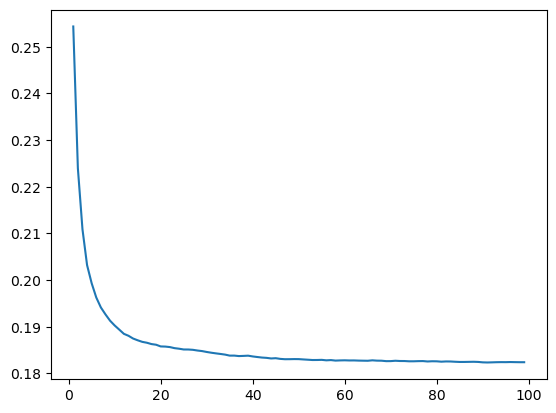

In [359]:
model = KNeighborsRegressor(60)
model.fit(x, y)

KNeighborsRegressor(n_neighbors=60)

In [360]:
test_df = pd.read_csv(r'C:\Users\archi\OneDrive\Desktop\Python Projects\Albone Dataset\test.csv')
test_df.columns = ['id','Sex','Length','Diameter','Height','ww','ww_1','ww_2','sw']

In [361]:
dummies = pd.get_dummies(test_df['Sex'], prefix='Sex')
test_df = pd.concat([test_df, dummies], axis = 1)

In [362]:
test_df.head()

id Sex  Length  Diameter  Height      ww    ww_1    ww_2      sw  Sex_F  \
0  90615   M   0.645     0.475   0.155  1.2380  0.6185  0.3125  0.3005      0   
1  90616   M   0.580     0.460   0.160  0.9830  0.4785  0.2195  0.2750      0   
2  90617   M   0.560     0.420   0.140  0.8395  0.3525  0.1845  0.2405      0   
3  90618   M   0.570     0.490   0.145  0.8740  0.3525  0.1865  0.2350      0   
4  90619   I   0.415     0.325   0.110  0.3580  0.1575  0.0670  0.1050      0   

   Sex_I  Sex_M  
0      0      1  
1      0      1  
2      0      1  
3      0      1  
4      1      0

In [364]:
x_test = test_df[['Length','Diameter','Height','ww','ww_1','ww_2','sw' ]]
y_pred = model.predict(x_test)

In [365]:
test_df['Rings'] = np.round(y_pred,0).astype('int32')

In [366]:
test_df = test_df[['id', 'Rings']]

In [367]:
test_df.to_csv('res_3.csv', index = False)